In [1]:
import konlpy
import pandas as pd

In [2]:
from konlpy.tag import Kkma
from konlpy.tag import Komoran

In [3]:
with open('category2_merge.txt', 'r', encoding='UTF8') as f:
    lines = f.read().splitlines()
lines

['레오 넘이뿌다 행복하게 편히 잘살아라♡',
 'This is really heartwarming 💓',
 '3:34꼬리:살랑살랑',
 '강형욱씨와 아내분 정말 대단하시네요 존경합니다 좋은일 하시는 만큼 두세배 다 되돌아오길 바랍니다🙏',
 '떨어져있던 동안 얼마나 보고싶었을지 형욱님 말 듣기만해도 눈물이 나네요 울지 마 내일 수능이야',
 '왜 눈물이 나지?? 슬픈 영상이아닌데??',
 '아웅 귀여웡ㅎ',
 '8년이나 공무에 종사했으면\xa0 남은생 행복하게 즐겁게만 살았으면좋겠네요그리고 퇴역견들 퇴직금대신 세금으로\xa0 노후보장하고 좋은가족만나서 쉴수있게 해줘요',
 '래오야 인자 어디가디말고 평생 같이살오',
 '레오랑 강형욱님 정말 행복해보여 보는 내내 뭉클하고 행복함을 느겼네요ㅎㅎ',
 '원래 자리로 돌아온것같아 기쁘네요~~^^',
 '너무 보기 좋아요',
 '아이구ㅠㅠㅠㅠ보는 내내 웃음이 끊이질 않네요,,, 레오 넘 귀엽다ㅠㅠㅠㅠ앞으로 편안하게 행복만 하길ㅠㅜ',
 '강형욱님을만나. 앞으로 험한산길이아닌 꽃길만걸을걸 생각하니 너무좋고 기쁩니다..',
 '레오 지금 몆살인지 아시는분 알려주세요 ㅜ',
 '전역한지 몇시간만에..늠름하던 베테랑 경찰견 => 똘아이 애기...',
 '7:59주운아!저 개랑 놀자말자 알았지???로 되어 있어요!!',
 'Great service Leo and you deserve a loving kindness and loving family',
 '이제는 정말 다 놔둬 되겠다 레오',
 '저게 어딜봐서 군견이여ㅠㅜㅠㅜ완전 아기똥강아지구먼ㅜㅠㅜㅜ ',
 'ㅇ욜루라리기여워ㅠㅜㅠㅜ아진자 많이늙었는대 힘펄펄한것보소 우리 푸들이는 8살밖에 안된ㄴ놈들이 늙었어ㅠㅜㅜㅜ아진자 넘  살앙스럽다',
 '강아지는 왜 남의 강아지 거기..냄새를 맡아요?',
 'Thank you for your service Leo!!',
 '최근 레오보다가 옛날 영상보니까 확실히 차이가 있어요!! 옛날보다 꼬리도 더 풍성해졌고 털도 윤기가 나네요 ㅎㅎ',


In [4]:
sentences = [line for line in lines if (line != '' and line != ' ')]
print(len(sentences))
sentences

65129


['레오 넘이뿌다 행복하게 편히 잘살아라♡',
 'This is really heartwarming 💓',
 '3:34꼬리:살랑살랑',
 '강형욱씨와 아내분 정말 대단하시네요 존경합니다 좋은일 하시는 만큼 두세배 다 되돌아오길 바랍니다🙏',
 '떨어져있던 동안 얼마나 보고싶었을지 형욱님 말 듣기만해도 눈물이 나네요 울지 마 내일 수능이야',
 '왜 눈물이 나지?? 슬픈 영상이아닌데??',
 '아웅 귀여웡ㅎ',
 '8년이나 공무에 종사했으면\xa0 남은생 행복하게 즐겁게만 살았으면좋겠네요그리고 퇴역견들 퇴직금대신 세금으로\xa0 노후보장하고 좋은가족만나서 쉴수있게 해줘요',
 '래오야 인자 어디가디말고 평생 같이살오',
 '레오랑 강형욱님 정말 행복해보여 보는 내내 뭉클하고 행복함을 느겼네요ㅎㅎ',
 '원래 자리로 돌아온것같아 기쁘네요~~^^',
 '너무 보기 좋아요',
 '아이구ㅠㅠㅠㅠ보는 내내 웃음이 끊이질 않네요,,, 레오 넘 귀엽다ㅠㅠㅠㅠ앞으로 편안하게 행복만 하길ㅠㅜ',
 '강형욱님을만나. 앞으로 험한산길이아닌 꽃길만걸을걸 생각하니 너무좋고 기쁩니다..',
 '레오 지금 몆살인지 아시는분 알려주세요 ㅜ',
 '전역한지 몇시간만에..늠름하던 베테랑 경찰견 => 똘아이 애기...',
 '7:59주운아!저 개랑 놀자말자 알았지???로 되어 있어요!!',
 'Great service Leo and you deserve a loving kindness and loving family',
 '이제는 정말 다 놔둬 되겠다 레오',
 '저게 어딜봐서 군견이여ㅠㅜㅠㅜ완전 아기똥강아지구먼ㅜㅠㅜㅜ ',
 'ㅇ욜루라리기여워ㅠㅜㅠㅜ아진자 많이늙었는대 힘펄펄한것보소 우리 푸들이는 8살밖에 안된ㄴ놈들이 늙었어ㅠㅜㅜㅜ아진자 넘  살앙스럽다',
 '강아지는 왜 남의 강아지 거기..냄새를 맡아요?',
 'Thank you for your service Leo!!',
 '최근 레오보다가 옛날 영상보니까 확실히 차이가 있어요!! 옛날보다 꼬리도 더 풍성해졌고 털도 윤기가 나네요 ㅎㅎ',


In [5]:
import re
import sys

def refine(TEXT):
    EMOJI = re.compile('['
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00010000-\U0010ffff"
                        ']+', flags=re.UNICODE)
    return EMOJI.sub(r'', TEXT)

In [85]:
import random
random = random.sample(sentences, 2000)

In [87]:
with open('random2000.txt', 'w', encoding = 'utf-8') as f:
    for item in random:
        f.write("%s\n" % item)

In [88]:
with open('random2000.txt', 'r', encoding='UTF8') as f:
    lines2 = f.read().splitlines()
lines2

['와!대박 1',
 'ㅋㅋㅋㅋㅋ진짜 에르메스보다 더잘어울려욬ㅋㅋ 3:52',
 '금수전가..',
 '명품만 이쁘네..',
 '대부분의 사람들은 돈을 많이 버는 사람들을 위해 매일 일하고 있으니까요. 뭐 아무리 본인이 직업에 만족한다해도 돈의 부족함에서 오는 상실감을 겪는다면 충분히 기분이 별로일 수 있죠ㅎ 그래도 사람 일이란 모르는거니 내가 가진 것에 감사하는것이 지금의 최선이네요😄화이팅',
 '으어어어 엄청 기다렸어요😍😍😍',
 '는 내 얘기',
 '얘는 과대포장~할 때 왜이리 귀엽고 웃기죠ㅋㅋㅋㅋㅋㅋ',
 '부럽다요 저는 명품은 내스타일이 아니여서  다 잘어울리네여',
 '진짜 다 개이뽀 오마이갓 ㅠㅠㅠㅠ 나두 언젠가 구찌랑 ㅠ ysl 크엉 이런영상 조아요!!! 자주 올려주세요!!!',
 '진짜 언니가 좋아하는 스타일이 제가 좋아하는 스타일이라 대리만족으로 너무 잘봤어요 ㅠㅠㅠ♡',
 '서주원님 시계 뭐차고 계신건가요? 잠깐보이는데도 엄청 이쁘네요!',
 '본인 돈을  사용하는 거니  제가 말할 부분은 아니지만  영상보고 쓸쓸해서',
 '입생백에서 쉼호흡 하다가 미우미우 케이스에서 울어따 ㅜㅜㅜ 존예시발 존예탱 오열 ㅜㅜㅜㅜㅜ',
 '내눈이 싸구련지 예쁜건지 잘모르겠다..ㅜㅜ',
 '근데 선글라스는 잘 안 어울리는거 같아요,, 개인적인 의견입니닷',
 '귀국하셨을 때 세관비 장난아니셨을거같아요 ㅠ ㅎㅎ 세관비는 어느정도 내는 건가요?',
 '02:05 02:07 너무 귀여우세요 ㅋㅋㅋㅋㅋㅋ',
 '명품 유행 완전히 갔음. 루이비똥도 동화면세점에서 철수할정도로! 그냥 그런 상태임. ㅋㅋㅋㅋ',
 '뭐 욕먹을거 생각하고 올리신것 같은데 보고 싶지 않으면 안보면 되죠 굳이 나쁜 얘기까지 하면서 볼 이유는 없을 것 같아요',
 '영상을 두개올리셨는데 구독자는1만명이네요!! 컨텐츠도 다양한 브랜드,분야에서도 열심히하길 바랍니다ㅎㅎ화이팅',
 '열등감 진짜 오졌다리 ~~~ 한별님 명품길만 걸으세요 💙💙',
 '그쪽들이 하는게 꼰대짓이고 내로남불에 열등감에 빠져 허우

In [89]:
sentences2 = [line for line in lines2 if (line != '' and line != ' ')]
print(len(sentences2))
sentences2

2000


['와!대박 1',
 'ㅋㅋㅋㅋㅋ진짜 에르메스보다 더잘어울려욬ㅋㅋ 3:52',
 '금수전가..',
 '명품만 이쁘네..',
 '대부분의 사람들은 돈을 많이 버는 사람들을 위해 매일 일하고 있으니까요. 뭐 아무리 본인이 직업에 만족한다해도 돈의 부족함에서 오는 상실감을 겪는다면 충분히 기분이 별로일 수 있죠ㅎ 그래도 사람 일이란 모르는거니 내가 가진 것에 감사하는것이 지금의 최선이네요😄화이팅',
 '으어어어 엄청 기다렸어요😍😍😍',
 '는 내 얘기',
 '얘는 과대포장~할 때 왜이리 귀엽고 웃기죠ㅋㅋㅋㅋㅋㅋ',
 '부럽다요 저는 명품은 내스타일이 아니여서  다 잘어울리네여',
 '진짜 다 개이뽀 오마이갓 ㅠㅠㅠㅠ 나두 언젠가 구찌랑 ㅠ ysl 크엉 이런영상 조아요!!! 자주 올려주세요!!!',
 '진짜 언니가 좋아하는 스타일이 제가 좋아하는 스타일이라 대리만족으로 너무 잘봤어요 ㅠㅠㅠ♡',
 '서주원님 시계 뭐차고 계신건가요? 잠깐보이는데도 엄청 이쁘네요!',
 '본인 돈을  사용하는 거니  제가 말할 부분은 아니지만  영상보고 쓸쓸해서',
 '입생백에서 쉼호흡 하다가 미우미우 케이스에서 울어따 ㅜㅜㅜ 존예시발 존예탱 오열 ㅜㅜㅜㅜㅜ',
 '내눈이 싸구련지 예쁜건지 잘모르겠다..ㅜㅜ',
 '근데 선글라스는 잘 안 어울리는거 같아요,, 개인적인 의견입니닷',
 '귀국하셨을 때 세관비 장난아니셨을거같아요 ㅠ ㅎㅎ 세관비는 어느정도 내는 건가요?',
 '02:05 02:07 너무 귀여우세요 ㅋㅋㅋㅋㅋㅋ',
 '명품 유행 완전히 갔음. 루이비똥도 동화면세점에서 철수할정도로! 그냥 그런 상태임. ㅋㅋㅋㅋ',
 '뭐 욕먹을거 생각하고 올리신것 같은데 보고 싶지 않으면 안보면 되죠 굳이 나쁜 얘기까지 하면서 볼 이유는 없을 것 같아요',
 '영상을 두개올리셨는데 구독자는1만명이네요!! 컨텐츠도 다양한 브랜드,분야에서도 열심히하길 바랍니다ㅎㅎ화이팅',
 '열등감 진짜 오졌다리 ~~~ 한별님 명품길만 걸으세요 💙💙',
 '그쪽들이 하는게 꼰대짓이고 내로남불에 열등감에 빠져 허우

In [6]:
sentences3 = [refine(s) for s in sentences]
print(len(sentences3))
sentences3

65129


['레오 넘이뿌다 행복하게 편히 잘살아라♡',
 'This is really heartwarming ',
 '3:34꼬리:살랑살랑',
 '강형욱씨와 아내분 정말 대단하시네요 존경합니다 좋은일 하시는 만큼 두세배 다 되돌아오길 바랍니다',
 '떨어져있던 동안 얼마나 보고싶었을지 형욱님 말 듣기만해도 눈물이 나네요 울지 마 내일 수능이야',
 '왜 눈물이 나지?? 슬픈 영상이아닌데??',
 '아웅 귀여웡ㅎ',
 '8년이나 공무에 종사했으면\xa0 남은생 행복하게 즐겁게만 살았으면좋겠네요그리고 퇴역견들 퇴직금대신 세금으로\xa0 노후보장하고 좋은가족만나서 쉴수있게 해줘요',
 '래오야 인자 어디가디말고 평생 같이살오',
 '레오랑 강형욱님 정말 행복해보여 보는 내내 뭉클하고 행복함을 느겼네요ㅎㅎ',
 '원래 자리로 돌아온것같아 기쁘네요~~^^',
 '너무 보기 좋아요',
 '아이구ㅠㅠㅠㅠ보는 내내 웃음이 끊이질 않네요,,, 레오 넘 귀엽다ㅠㅠㅠㅠ앞으로 편안하게 행복만 하길ㅠㅜ',
 '강형욱님을만나. 앞으로 험한산길이아닌 꽃길만걸을걸 생각하니 너무좋고 기쁩니다..',
 '레오 지금 몆살인지 아시는분 알려주세요 ㅜ',
 '전역한지 몇시간만에..늠름하던 베테랑 경찰견 => 똘아이 애기...',
 '7:59주운아!저 개랑 놀자말자 알았지???로 되어 있어요!!',
 'Great service Leo and you deserve a loving kindness and loving family',
 '이제는 정말 다 놔둬 되겠다 레오',
 '저게 어딜봐서 군견이여ㅠㅜㅠㅜ완전 아기똥강아지구먼ㅜㅠㅜㅜ ',
 'ㅇ욜루라리기여워ㅠㅜㅠㅜ아진자 많이늙었는대 힘펄펄한것보소 우리 푸들이는 8살밖에 안된ㄴ놈들이 늙었어ㅠㅜㅜㅜ아진자 넘  살앙스럽다',
 '강아지는 왜 남의 강아지 거기..냄새를 맡아요?',
 'Thank you for your service Leo!!',
 '최근 레오보다가 옛날 영상보니까 확실히 차이가 있어요!! 옛날보다 꼬리도 더 풍성해졌고 털도 윤기가 나네요 ㅎㅎ',
 '

In [7]:
sentences4 = [line for line in sentences3 if (line != '' and line != ' ' and line)]
print(len(sentences4))
sentences4

63923


['레오 넘이뿌다 행복하게 편히 잘살아라♡',
 'This is really heartwarming ',
 '3:34꼬리:살랑살랑',
 '강형욱씨와 아내분 정말 대단하시네요 존경합니다 좋은일 하시는 만큼 두세배 다 되돌아오길 바랍니다',
 '떨어져있던 동안 얼마나 보고싶었을지 형욱님 말 듣기만해도 눈물이 나네요 울지 마 내일 수능이야',
 '왜 눈물이 나지?? 슬픈 영상이아닌데??',
 '아웅 귀여웡ㅎ',
 '8년이나 공무에 종사했으면\xa0 남은생 행복하게 즐겁게만 살았으면좋겠네요그리고 퇴역견들 퇴직금대신 세금으로\xa0 노후보장하고 좋은가족만나서 쉴수있게 해줘요',
 '래오야 인자 어디가디말고 평생 같이살오',
 '레오랑 강형욱님 정말 행복해보여 보는 내내 뭉클하고 행복함을 느겼네요ㅎㅎ',
 '원래 자리로 돌아온것같아 기쁘네요~~^^',
 '너무 보기 좋아요',
 '아이구ㅠㅠㅠㅠ보는 내내 웃음이 끊이질 않네요,,, 레오 넘 귀엽다ㅠㅠㅠㅠ앞으로 편안하게 행복만 하길ㅠㅜ',
 '강형욱님을만나. 앞으로 험한산길이아닌 꽃길만걸을걸 생각하니 너무좋고 기쁩니다..',
 '레오 지금 몆살인지 아시는분 알려주세요 ㅜ',
 '전역한지 몇시간만에..늠름하던 베테랑 경찰견 => 똘아이 애기...',
 '7:59주운아!저 개랑 놀자말자 알았지???로 되어 있어요!!',
 'Great service Leo and you deserve a loving kindness and loving family',
 '이제는 정말 다 놔둬 되겠다 레오',
 '저게 어딜봐서 군견이여ㅠㅜㅠㅜ완전 아기똥강아지구먼ㅜㅠㅜㅜ ',
 'ㅇ욜루라리기여워ㅠㅜㅠㅜ아진자 많이늙었는대 힘펄펄한것보소 우리 푸들이는 8살밖에 안된ㄴ놈들이 늙었어ㅠㅜㅜㅜ아진자 넘  살앙스럽다',
 '강아지는 왜 남의 강아지 거기..냄새를 맡아요?',
 'Thank you for your service Leo!!',
 '최근 레오보다가 옛날 영상보니까 확실히 차이가 있어요!! 옛날보다 꼬리도 더 풍성해졌고 털도 윤기가 나네요 ㅎㅎ',
 '

In [8]:
tagged_sentences2 = []
tagger = Komoran()

for sent in sentences4:
    try:
        tagged_sentences2.append(tagger.pos(sent)) 
    except:
        True 
print(len(tagged_sentences2))
tagged_sentences2[0]

63897


[('레오', 'NNP'),
 ('넘이뿌다', 'NA'),
 ('행복', 'NNG'),
 ('하', 'XSV'),
 ('게', 'EC'),
 ('편히', 'MAG'),
 ('잘살', 'VV'),
 ('ㄹ', 'ETM'),
 ('아라', 'NNP'),
 ('♡', 'SW')]

In [9]:
adj_list = []
for sent in tagged_sentences2:    
    for word, tag in sent:
        if tag == 'VA':
            adj_list.append(word)
print(len(adj_list))
adj_list[:10]

6521


['좋', '슬프', '즐겁', '좋', '좋', '같', '기쁘', '좋', '험하', '좋']

In [10]:
from collections import Counter
adj_counts = Counter(adj_list)
adj_counts.most_common()

[('귀엽', 1445),
 ('좋', 806),
 ('같', 665),
 ('없', 273),
 ('이렇', 227),
 ('맛있', 216),
 ('많', 197),
 ('크', 173),
 ('이쁘', 169),
 ('저렇', 157),
 ('그렇', 154),
 ('어떻', 134),
 ('예쁘', 121),
 ('순하', 96),
 ('괜찮', 91),
 ('아프', 80),
 ('착하', 73),
 ('날카롭', 71),
 ('재밌', 63),
 ('작', 51),
 ('힘들', 49),
 ('무섭', 49),
 ('싫', 47),
 ('시', 43),
 ('어리', 41),
 ('편하', 40),
 ('멋지', 36),
 ('즐겁', 35),
 ('슬프', 33),
 ('고맙', 33),
 ('똑같', 29),
 ('부럽', 27),
 ('부드럽', 27),
 ('멀', 24),
 ('다르', 23),
 ('쉽', 22),
 ('길', 22),
 ('기쁘', 20),
 ('하얗', 20),
 ('짧', 18),
 ('새롭', 18),
 ('재미있', 18),
 ('안되', 18),
 ('배고프', 17),
 ('잘', 16),
 ('나쁘', 15),
 ('약하', 15),
 ('맛나', 14),
 ('쎄', 13),
 ('높', 12),
 ('엄청나', 12),
 ('잘생기', 12),
 ('강하', 12),
 ('아름답', 11),
 ('멋있', 11),
 ('심하', 11),
 ('늦', 11),
 ('상관없', 10),
 ('어렵', 9),
 ('징그럽', 9),
 ('급하', 9),
 ('맛없', 9),
 ('반갑', 8),
 ('낫', 8),
 ('야무지', 8),
 ('아깝', 8),
 ('빨갛', 8),
 ('바르', 7),
 ('찡하', 7),
 ('적', 7),
 ('아쉽', 7),
 ('낯설', 7),
 ('까맣', 7),
 ('희', 6),
 ('친하', 6),
 ('귀찮', 6),
 ('사납', 6),
 ('동그랗', 6),


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [12]:
cloud = WordCloud(width=900, height=600, 
                  font_path='08서울남산체 B.ttf',
                  background_color='white')

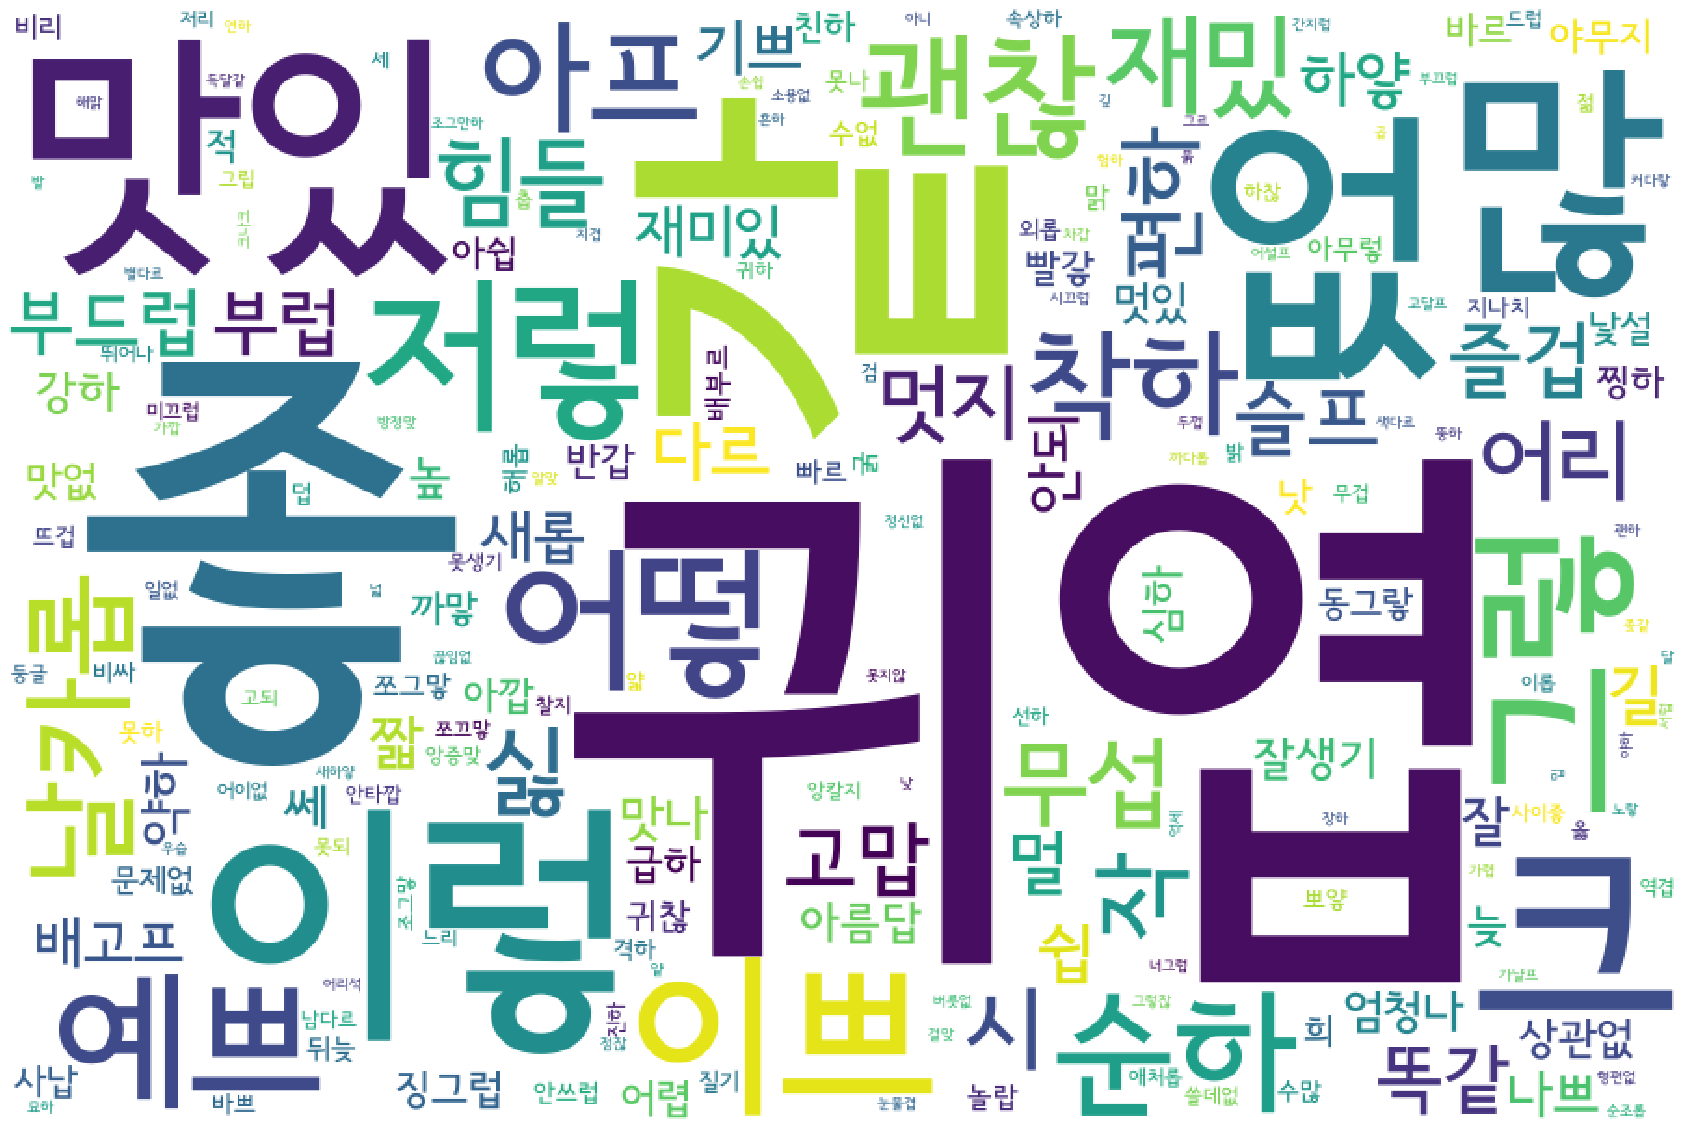

In [13]:
cloud = cloud.fit_words(adj_counts)
fig = plt.figure(figsize=(30, 40))
plt.imshow(cloud)
plt.axis('off')
plt.savefig('category2_adj.jpg')
plt.show()

In [14]:
noun_list = []
for sent in tagged_sentences2:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            noun_list.append(word)
noun_list2 = [n for n in noun_list if n not in ('!!', '!!!', '루', '닭', '레오')]
print(len(noun_list2))
noun_list2[:10]

44049


['행복', '아라', '꼬리', '강', '형', '아내', '존경', '일', '세배', '동안']

In [15]:
noun_counts = Counter(noun_list2)
noun_counts.most_common()

[('강아지', 1065),
 ('뼈', 888),
 ('소녀', 839),
 ('귀', 640),
 ('귀여워', 630),
 ('영상', 571),
 ('때', 501),
 ('넘', 477),
 ('고양이', 453),
 ('집사', 443),
 ('행복', 438),
 ('ال', 428),
 ('소리', 423),
 ('이', 420),
 ('아빠', 395),
 ('사람', 335),
 ('안', 326),
 ('견', 306),
 ('애기', 268),
 ('얌전', 242),
 ('노을', 234),
 ('사랑', 232),
 ('장난감', 231),
 ('집', 229),
 ('오늘', 226),
 ('애', 212),
 ('엽', 211),
 ('생식', 204),
 ('심장', 200),
 ('형', 199),
 ('아', 198),
 ('댓글', 190),
 ('말', 184),
 ('강', 179),
 ('하', 179),
 ('처음', 178),
 ('털', 177),
 ('심', 175),
 ('미용', 174),
 ('요', 173),
 ('어', 167),
 ('건강', 157),
 ('행성', 157),
 ('오', 153),
 ('표정', 152),
 ('엄마', 151),
 ('졸', 151),
 ('모습', 150),
 ('생각', 149),
 ("I've", 148),
 ('위험', 140),
 ('눈', 134),
 ('아기', 121),
 ('감사', 112),
 ('눈물', 110),
 ('포', 107),
 ('동물', 106),
 ('북극곰', 106),
 ('이제', 104),
 ('전', 104),
 ('완전', 103),
 ('곰', 101),
 ('치킨', 100),
 ('진짜', 97),
 ('눈치', 96),
 ('다', 95),
 ('주인', 95),
 ('사', 94),
 ('제가', 94),
 ('느', 90),
 ('가족', 89),
 ('세상', 88),
 ('먹방', 88),
 ('아가', 

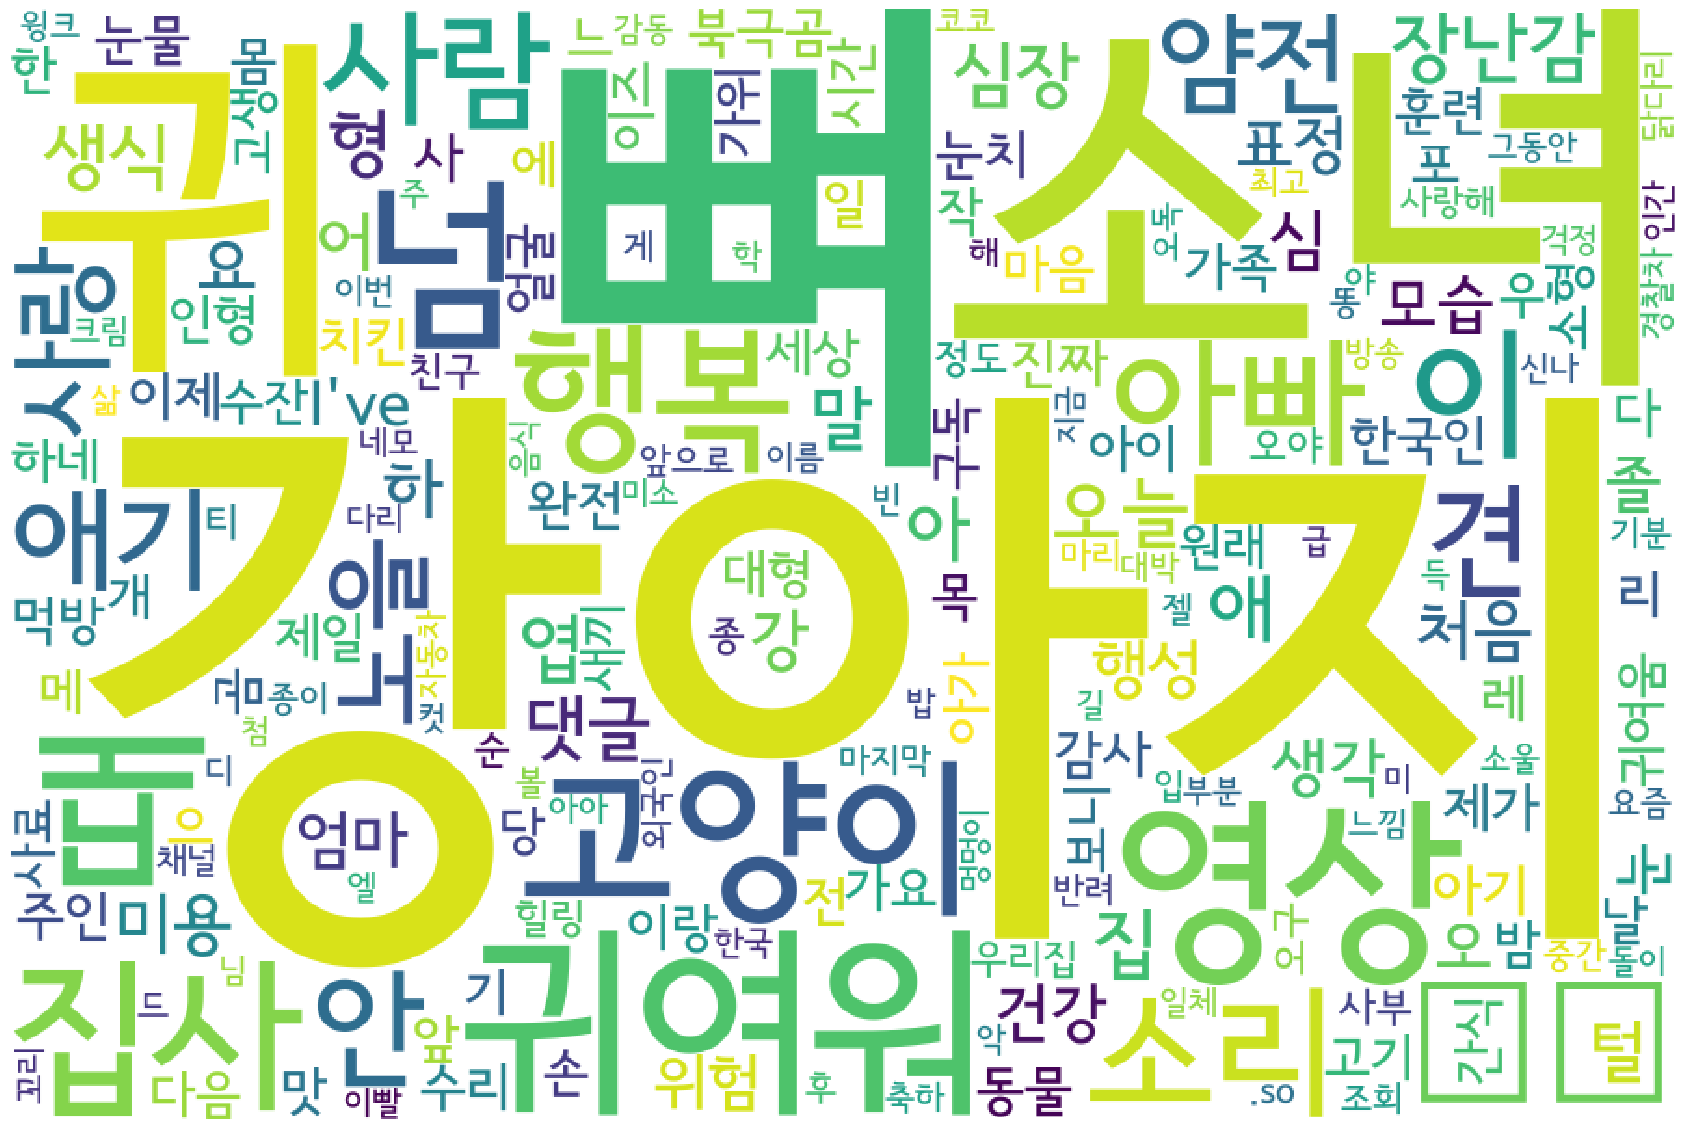

In [18]:
cloud = cloud.fit_words(noun_counts)
fig = plt.figure(figsize=(30, 40))
plt.imshow(cloud)
plt.axis('off')
plt.savefig("category3_noun.jpg")
plt.show()